## Exercicios

In [14]:
!pip install seaborn
!pip install pandas
!pip install sklearn
!pip install numpy
!pip install matplotlib

  Using cached sklearn-0.0.post1.tar.gz (3.6 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for sklearn: filename=sklearn-0.0.post1-py3-none-any.whl size=2936 sha256=ec2c4439f4887b40d4ef7110e01bd304064f148e9705fa940e1166d3bf9192bd
  Stored in directory: c:\users\thiag\appdata\local\pip\cache\wheels\03\8b\6f\9f13c705de81a6b351b718b3cf917e41ad7c0933c8630d4dd4
Successfully built sklearn


In [15]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [22]:
insurance = pd.read_csv('../datasets/insurance.csv')
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [23]:
insurance['sex'] = insurance['sex'].map({'female': 0, 'male': 1})

In [24]:
insurance['smoker'] = insurance['smoker'].map({'no' : 0, 'yes' : 1})

In [25]:
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,southwest,16884.92400
1,18,1,33.770,1,0,southeast,1725.55230
2,28,1,33.000,3,0,southeast,4449.46200
3,33,1,22.705,0,0,northwest,21984.47061
4,32,1,28.880,0,0,northwest,3866.85520


In [26]:
insurance['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

In [55]:
pd.get_dummies(data=insurance['region'], drop_first=True)

,northwest,southeast,southwest
0,0,0,1
1,0,1,0
2,0,1,0
3,1,0,0
4,1,0,0
...,...,...,...
1333,1,0,0
1334,0,0,0
1335,0,1,0
1336,0,0,1


In [27]:
x = insurance[['age', 'bmi', 'smoker']]
y = insurance['charges']

In [28]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.75, random_state=42)

In [29]:
modelo = LinearRegression()
modelo.fit(x_train, y_train)

LinearRegression()

In [30]:
y_pred = modelo.predict(x_test)

In [31]:
mean_absolute_error(y_pred, y_test)

4301.327214279141

In [32]:
insurance['charges'].mean()

13270.422265141257

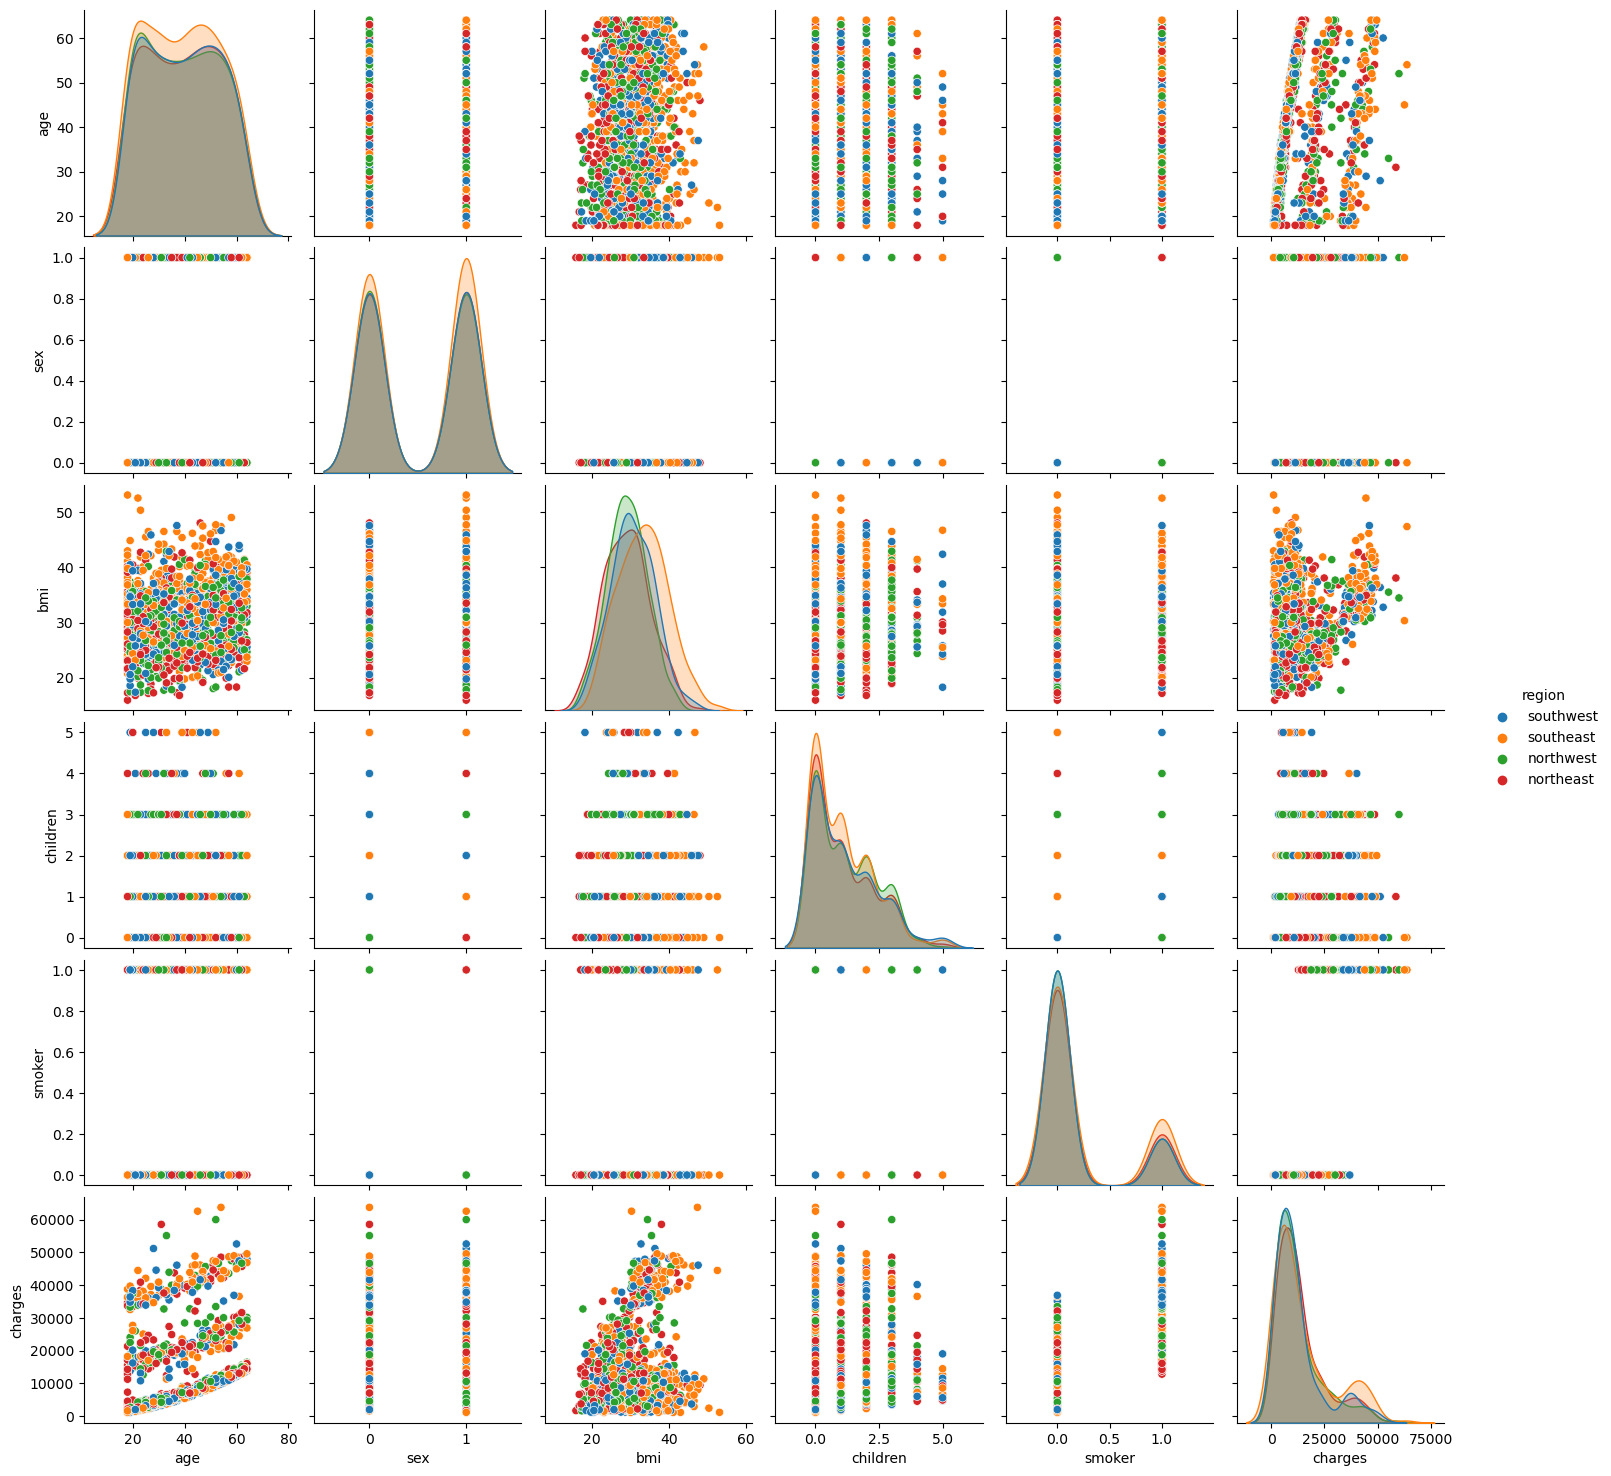

In [33]:
sns.pairplot(insurance, hue='region')

In [35]:
!pip install mlxtend

     ---------------------------------------- 1.3/1.3 MB 231.7 kB/s eta 0:00:00


In [36]:
from mlxtend.plotting import plot_decision_regions
from sklearn import datasets
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score,  precision_score, recall_score, f1_score, classification_report

In [45]:
iris = sns.load_dataset('iris')
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [39]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [40]:
iris['species'].value_counts()

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

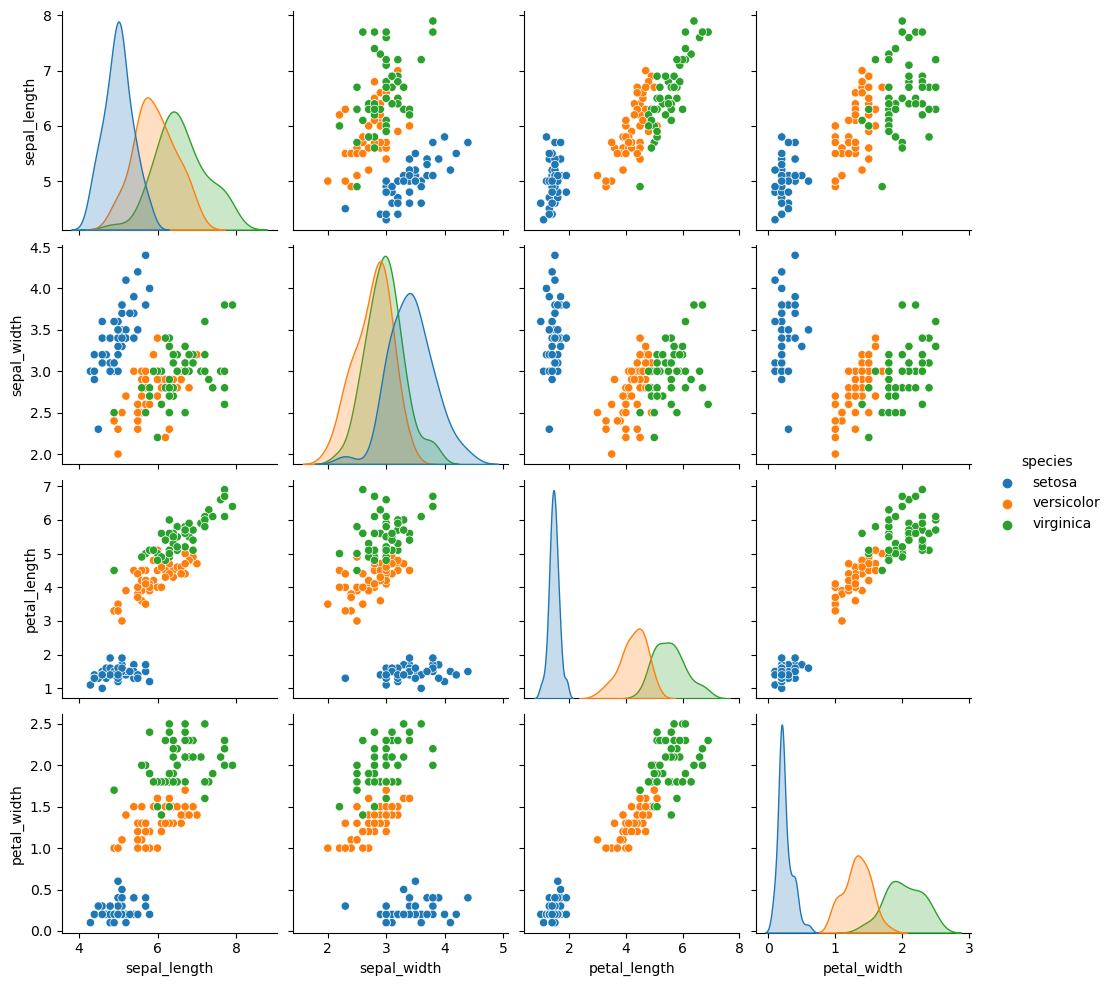

In [41]:
sns.pairplot(iris, hue='species')

In [43]:
# A regressão logísitica, apesar do nome, não é de fato uma regressão, mas sim uma classificação.
# Ela não nos retorna um valor numérico, mas sim se algo é ou não uma coisa, sim ou não, uma classificação.

In [46]:
regressao_logistica = LogisticRegression(multi_class = 'auto', max_iter=5000)
X = iris.drop(['species'], axis = 1)
y = iris['species']

In [47]:
x_train, x_test, y_train, y_test = train_test_split(X, y, train_size = 0.75, random_state=42)

In [49]:
regressao_logistica.fit(x_train, y_train)

LogisticRegression(max_iter=5000)

In [50]:
y_pred = regressao_logistica.predict(x_test)

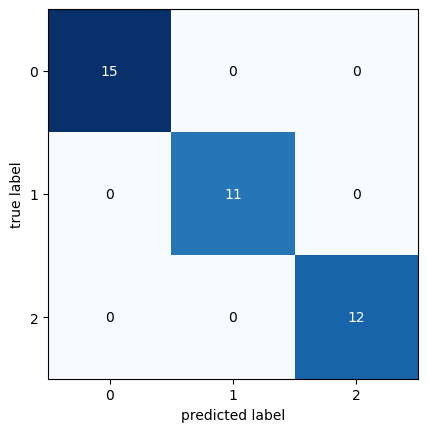

In [51]:
cm = confusion_matrix(y_test, y_pred)

plot_confusion_matrix(conf_mat=cm)
plt.show()

In [52]:
# Em ML temos sempre dois medos:

# - Fitting: Quando treinamos o algoritmo e ele aprende com nossa base;

# - Underfitting: Quando o algoritmo aprende d-menos, ou seja, vai chutar algumas vezes. Geralmente acontece quando o modelo não percebe as nuances da base ou quando temos base d-menos.

# - Overfitting: Quando o modelo "decora" a base, vicia a base. Tudo que sair do planejado, do que estiver no padrão da base vai quebrar o modelo;


In [53]:
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       1.00      1.00      1.00        11
   virginica       1.00      1.00      1.00        12

    accuracy                           1.00        38
   macro avg       1.00      1.00      1.00        38
weighted avg       1.00      1.00      1.00        38



## Validação Cruzada

## 1) Validação cruzada (cross validation)

O cross validation (CV) é uma das técnicas mais importantes no ferramental de um cientista de dados.

Operacionalmente, o CV implementa diferentes conjuntos de treino e teste (aqui chamados de **validação**), criando efetivamente diferentes modelos treinados e avaliados em diferentes suconjuntos aleatórios (os chamados **folds**) da base de dados original. 

No fim, é possível inspecionar as métricas de interesse em cada fold, bem como ter uma ideia da performance média do modelo, olhando para **a distribuição das métricas de avaliação**.

Note que este procedimento está intimamente relacionado com a avaliação da desejável habilidade de **generalização do modelo**!

A forma mais comum de fazermos CV é através da técnica **k-fold**:

<img src=https://scikit-learn.org/stable/_images/grid_search_cross_validation.png width=500>

No extremo desta abordagem, podemos tomar o número $k$ de folds igual ao número de observações na base ($n$). Neste caso, utiliza-se **uma única** observação para teste, enquanto o resto do dataset é utilizado para treino. Essa abordagem é conhecida como **leave one out (LOO)**:

<img src=https://assets.datacamp.com/production/repositories/3981/datasets/8a6236f142b1ee2e4a70aae2af9507c7c580f302/Screen%20Shot%202019-01-27%20at%209.25.41%20AM.png width=500>

Note que o esforço computacional aumenta conforme $k$ aumenta, sendo máximo quando $k=n$. Por esse motivo, recomenda-se usar o LOO apenas nos casos em que o número de observções na base original é bem pequeno ($\sim 10^2$).

### Em termos simples...

O *cross-validation* é uma maneira de avaliarmos se estamos viciando ou não nossos dados.
Fazemos isso fatiando os dados em vários pedaços menores e fazendo ele rodar o teste para cada pedacinho desses.
- Se rodarmos os testes e ele retornar resultados diferentes para cada pedaço e esses resultados estão em uma faixa próxima, isso indica que mesmo que misturemos as bases, o resultado do modelo está condizente com a base.

In [56]:
from sklearn.model_selection import KFold

In [57]:
from sklearn.model_selection import cross_validate


In [58]:
rl = LogisticRegression(multi_class = 'auto', max_iter=5000)
X = iris.drop(['species'], axis = 1)
y = iris['species']

In [60]:
kf5 = KFold(n_splits=5, shuffle=True, random_state=42)

results_cv = cross_validate(estimator=rl, X=X, y=y,
                           cv=kf5, scoring="accuracy",
                           return_train_score=True, return_estimator=True)

In [61]:
df_results_cv = pd.DataFrame(results_cv)

In [64]:
df_results_cv
# Podemos verificar que não é em todos os casos que acertou tudo no teste (test_score), o que é um bom indicativo de que não deu overfit

,fit_time,score_time,estimator,test_score,train_score
0,0.031490,0.001997,LogisticRegression(max_iter=5000),1.000000,0.975000
1,0.023645,0.000632,LogisticRegression(max_iter=5000),1.000000,0.958333
2,0.024639,0.001002,LogisticRegression(max_iter=5000),0.933333,0.983333
3,0.017045,0.001925,LogisticRegression(max_iter=5000),0.966667,0.975000
4,0.023522,0.001039,LogisticRegression(max_iter=5000),0.966667,0.983333


In [65]:
df_results_cv.describe()

,fit_time,score_time,test_score,train_score
count,5.000000,5.000000,5.000000,5.000000
mean,0.024068,0.001319,0.973333,0.975000
std,0.005129,0.000608,0.027889,0.010206
min,0.017045,0.000632,0.933333,0.958333
25%,0.023522,0.001002,0.966667,0.975000
50%,0.023645,0.001039,0.966667,0.975000
75%,0.024639,0.001925,1.000000,0.983333
max,0.031490,0.001997,1.000000,0.983333


A partir daqui, escolhes umas das formas/folds que preferirmos e podemos trabalhar com o modelo normalmente.

In [74]:
results_cv['estimator'][3].predict(x_test)

array(['versicolor', 'setosa', 'virginica', 'versicolor', 'versicolor',
       'setosa', 'versicolor', 'virginica', 'versicolor', 'versicolor',
       'virginica', 'setosa', 'setosa', 'setosa', 'setosa', 'versicolor',
       'virginica', 'versicolor', 'versicolor', 'virginica', 'setosa',
       'virginica', 'setosa', 'virginica', 'virginica', 'virginica',
       'virginica', 'virginica', 'setosa', 'setosa', 'setosa', 'setosa',
       'versicolor', 'setosa', 'setosa', 'virginica', 'versicolor',
       'setosa'], dtype=object)

In [75]:
x_train, x_test, y_train, y_test = train_test_split(X, y, train_size = 0.75, random_state=42)

In [76]:
regressao_logistica.fit(x_train, y_train)

LogisticRegression(max_iter=5000)

In [77]:
y_pred = regressao_logistica.predict(x_test)

In [71]:
def plot_cv(estimator, X, y, n_splits, scoring):
    '''
    scoring: string relativa às métricas
    '''
    
    kf5 = KFold(n_splits=n_splits, shuffle=True, random_state=42)

    result_cv = cross_validate(estimator=estimator, X=X, y=y, 
                               cv=kf5, scoring=scoring,
                               return_train_score=True)
    
    # ============================

    df_result_cv = pd.DataFrame(result_cv)
    df_result_cv = df_result_cv.abs()
    
    display(df_result_cv[["train_score", "test_score"]].describe())
    
    # ============================
    
    print("\nDistribuição de métricas de treino:")
    sns.histplot(data=df_result_cv, x="train_score", kde=True)
    plt.show()
    
    print("\nDistribuição de métricas de teste:")
    sns.histplot(data=df_result_cv, x="test_score", kde=True)
    plt.show()
    
    print("\nAs duas juntas (compare a variância!):")
    sns.histplot(data=df_result_cv, x="train_score", kde=True)
    sns.histplot(data=df_result_cv, x="test_score", color="orange", kde=True)
    plt.show()

,train_score,test_score
count,20.000000,20.000000
mean,0.974030,0.958036
std,0.005633,0.080545
min,0.965035,0.714286
25%,0.971831,0.968750
50%,0.971929,1.000000
75%,0.973739,1.000000
max,0.993007,1.000000



Distribuição de métricas de treino:


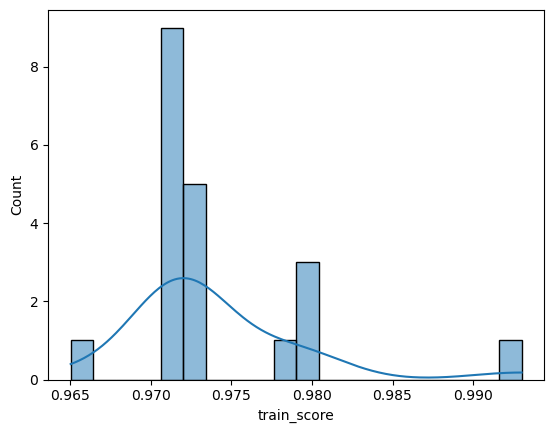


Distribuição de métricas de teste:


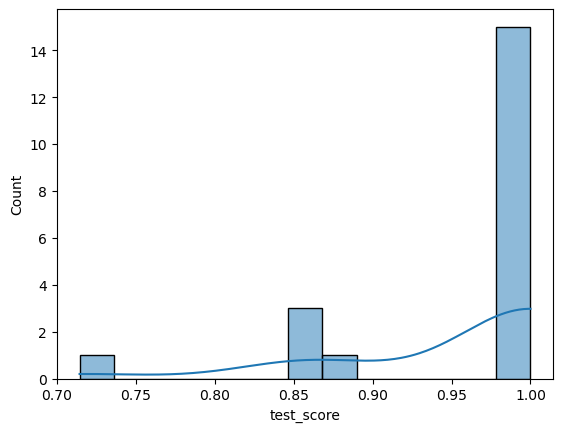


As duas juntas (compare a variância!):


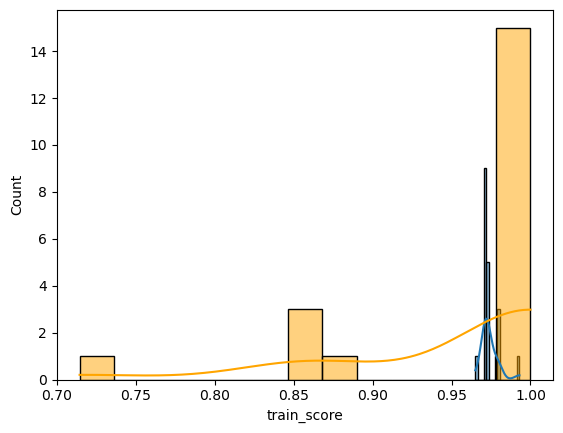

In [72]:
plot_cv(rl, X, y, 20, 'accuracy')

In [83]:
breast_cancer = pd.read_csv('../datasets/breast_cancer.csv')

In [84]:
 breast_cancer.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [86]:
breast_cancer = breast_cancer.drop(columns=['id'], axis=1)

In [87]:
 breast_cancer.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [81]:
breast_cancer.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


Como podemos notar na base acima, a uma grande diferença na grandeza de algumas colunas. Enquanto uma trabalha na casa das centenas, outra fica localizada na casa dos decimais.

Precisamos, então, normalizar a base.

In [93]:
from sklearn.preprocessing import StandardScaler 
# Vai ajustar a base aos dados e nos possibilita transformar as características

In [91]:
X = breast_cancer.drop('diagnosis', axis=1)
y = breast_cancer['diagnosis']

In [92]:
X

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [94]:
scaler = StandardScaler()

In [95]:
x_train, x_test, y_train, y_test = train_test_split(X, y, train_size = 0.80, random_state=42)

In [96]:
x_train_std = scaler.fit_transform(x_train)
# O escalonador vai fazer um fit nos dados de treino e escaloná-los para nós com base em toda a base

In [99]:
x_test_std = scaler.transform(x_test)
# Aqui não fazemos o fit transform, somente o transform, para que os dados de teste não sejam influenciados pelos dados de treino ajustados


# Só fazemos as transformações para os X porque o alvo/y vai continuar sendo a mesma resposta, neste caso, maligno ou benigno


In [101]:
lr_cancer = LogisticRegression(max_iter=5000)

In [102]:
lr_cancer.fit(x_train_std, y_train)

LogisticRegression(max_iter=5000)

In [103]:
y_pred = lr_cancer.predict(x_test_std)

In [104]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           B       0.97      0.99      0.98        71
           M       0.98      0.95      0.96        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



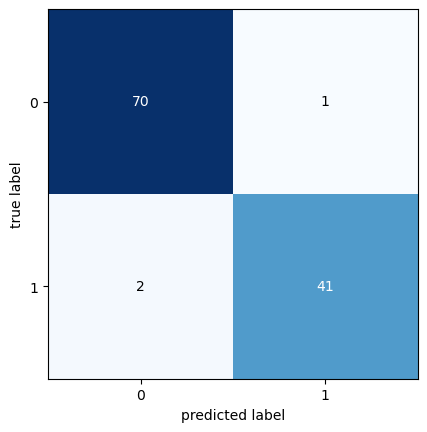

In [105]:
cm = confusion_matrix(y_test, y_pred)

plot_confusion_matrix(conf_mat=cm)
plt.show()

Neste caso, temos que para 100 casos, erramos 3.

